In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import math

In [2]:
def plotFunc(func):
    x = np.arange(-1, 1, 0.01)
    y = [func(x[i]) for i in range(0, len(x))]
   
    plt.plot(x, y)
    
def w():
    return 2*math.pi/2

In [3]:
def a(n, func):
    return 2*integrate.quad(lambda x: func(x) * math.cos(n*x*w()), 0, 1)[0]

In [4]:
def b(n, func):
    return 2*integrate.quad(lambda x: func(x) * math.sin(n*x*w()), 0, 1)[0]

In [5]:
def coefs(N, coeff, func):
    return [coeff(i, func) for i in range(0, N)]

In [6]:
def func(x):
    return 1 - x

def evenFunc(x):
    return func(x) if x > 0 else func(-x)
def oddFunc(x):
    return func(x) if x > 0 else -func(-x)

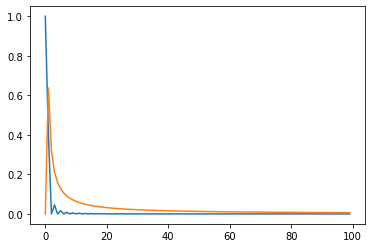

In [7]:
plt.plot(np.arange(0, 100), coefs(100, a, evenFunc)) #a coeffs for even func
plt.plot(np.arange(0, 100), coefs(100, b, oddFunc)) #b coeffs for odd func

In [8]:
def FurierSeries(x, aCoeffs, bCoeffs):
    results = np.zeros(len(x))
    for i in range(0, len(x)):
        y = aCoeffs[0]/2 + bCoeffs[0]/2
        
        for j in range(1, len(aCoeffs)):
            y += aCoeffs[j]*math.cos(j*x[i]*w())
            
        for j in range(1, len(bCoeffs)):
            y += bCoeffs[j]*math.sin(j*x[i]*w())
            
        results[i] = y
    return results

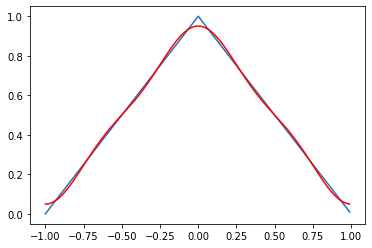

In [9]:
plotFunc(evenFunc)
plt.plot(np.arange(-1,1,0.01), FurierSeries(np.arange(-1,1,0.01), coefs(5, a, evenFunc), np.zeros(4)), color = "red")

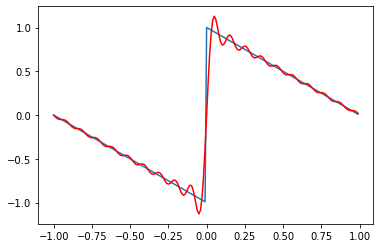

In [10]:
plotFunc(oddFunc)
plt.plot(np.arange(-1,1,0.01), FurierSeries(np.arange(-1,1,0.01), np.zeros(20), coefs(20, b, oddFunc)), color = "red")

In [11]:
#более неудобная функция
def func2(x):
    return (x**2+1)*np.cos(x)

def evenFunc2(x):
    return func2(x) if x > 0 else func2(-x)
def oddFunc2(x):
    return func2(x) if x > 0 else -func2(-x)

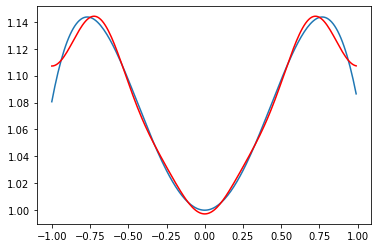

In [12]:
plotFunc(evenFunc2)
plt.plot(np.arange(-1,1,0.01), FurierSeries(np.arange(-1,1,0.01), coefs(5, a, evenFunc2), np.zeros(4)), color = "red")

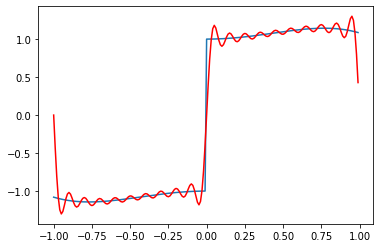

In [13]:
plotFunc(oddFunc2)
plt.plot(np.arange(-1,1,0.01), FurierSeries(np.arange(-1,1,0.01), np.zeros(20), coefs(20, b, oddFunc2)), color = "red")

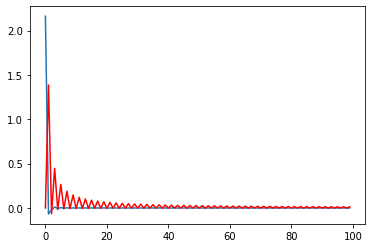

In [14]:
plt.plot(np.arange(0, 100), coefs(100, a, evenFunc2)) #a coeffs for even func
plt.plot(np.arange(0, 100), coefs(100, b, oddFunc2), color="red") #b coeffs for odd func